## Import dependencies

In [3]:
from landlab import RasterModelGrid
import landlab
import numpy as np
from pylab import show, figure
from landlab.io import read_esri_ascii

In [2]:
dir(landlab.plot.imshow)

['FieldError',
 'LineCollection',
 'PatchCollection',
 'Polygon',
 'RasterModelGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 '_imshow_grid_values',
 'imshow_grid',
 'imshow_grid_at_cell',
 'imshow_grid_at_node',
 'np',
 'plt',
 'query_grid_on_button_press']

## Load DEM

In [2]:
(mg, z) = read_esri_ascii("bacia_piratini_90m.asc", name="topographic__elevation")
mg.at_node.keys()

NameError: name 'read_esri_ascii' is not defined

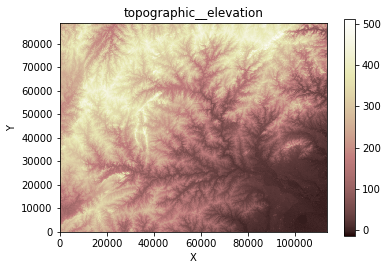

In [4]:
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

## Initialize Components

In [5]:
from landlab.components import LinearDiffuser
from pylab import show, figure, plot

In [9]:
dfn = LinearDiffuser(mg, linear_diffusivity=0.01)

## Set boundary

In [24]:
mg.set_fixed_value_boundaries_at_grid_edges(False, True, False, True)
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)

In [25]:
mg.at_link['topographic__slope'] = mg.calc_grad_at_link('topographic__elevation')
mg.status_at_node[mg.perimeter_nodes] = mg.BC_NODE_IS_FIXED_GRADIENT
dfn.updated_boundary_conditions()

In [16]:
dfn.fixed_grad_nodes

array([      1,       2,       3, ..., 1250525, 1250526, 1250527])

## Run model

In [21]:
for i in range(10):
    z[mg.core_nodes] += 1.
    dfn.run_one_step(5000)

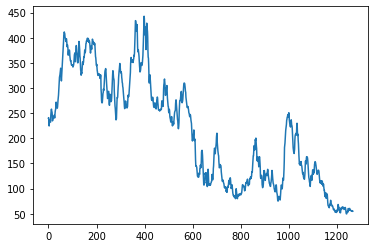

In [26]:
plot(mg.node_vector_to_raster(z)[mg.number_of_node_rows//2,:])

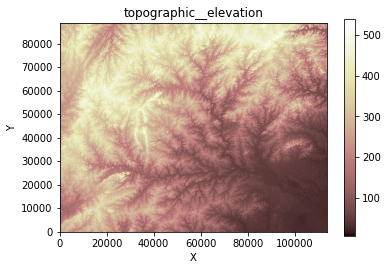

In [33]:
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

In [6]:

import numpy as np

from landlab import Component
from landlab.components import FlowAccumulator, ChannelProfiler

In [14]:
class Deposicao(Component):    
    
    _name = "MorganaModel"
    
    def __init__(self, dem, A):
        self.dem = dem
        self.A = A
        self.b = 0.000008
        self.k = 0.0001
        self.p = 0.3
        self.m = 0.4
        self.n = 1
        self.elev = grid.at_node["topographic__elevation"]
        
    def run_one_step(self):
        Sc = ((self.b/self.k)* self.A*self.p-self.m)*1/self.n
        
        return Sc

In [15]:
comp = Deposicao(mg, 60)

In [16]:
for i in range(10):
    
    comp.run_one_step()

In [17]:
mg.at_node["topographic__elevation"]

array([ 244.,  241.,  242., ...,  205.,  220.,  228.])

In [54]:
accumulator = FlowAccumulator(mg, "topographic__elevation",  flow_director='D4')

In [55]:
iteracoes = 10
accumulator.run_one_step()

In [22]:
mg.at_node['flow__receiver_node'] 

array([      0,       1,       2, ..., 1250526, 1250527, 1250528])

In [27]:
accumulator.node_drainage_area.reshape(mg.shape)

array([[     0.,  16200.,   8100., ...,      0.,   8100.,      0.],
       [     0.,  16200.,   8100., ...,   8100.,   8100.,      0.],
       [     0.,   8100.,   8100., ...,  16200.,   8100.,      0.],
       ..., 
       [     0.,  32400.,   8100., ...,  16200.,   8100.,      0.],
       [     0.,   8100.,  24300., ...,  16200.,   8100.,      0.],
       [     0.,      0.,  24300., ...,      0.,      0.,      0.]])

In [63]:
profiler = ChannelProfiler(mg,
                           number_of_watersheds=2,
                           minimum_channel_threshold=0)

In [64]:
profiler.run_one_step()

In [59]:
list(mg.at_node.keys())

['topographic__elevation',
 'water__unit_flux_in',
 'flow__sink_flag',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'surface_water__discharge']

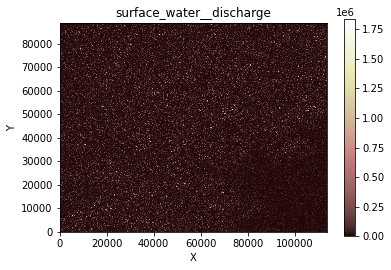

In [61]:
landlab.plot.imshow.imshow_grid_at_node(mg,'surface_water__discharge')

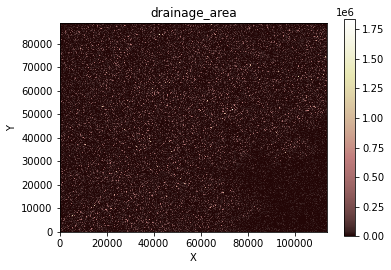

In [60]:
landlab.plot.imshow.imshow_grid_at_node(mg,'drainage_area')

In [66]:
profiler.data_structure.keys()

odict_keys([1249460, 1249857])

In [68]:
profiler.data_structure[1249460].keys()

dict_keys([(1249460, 1235518)])

In [69]:
profiler.data_structure[1249460][(1249460, 1235518)]["distances"]

array([    0.,    90.,   180.,   270.,   360.,   450.,   540.,   630.,
         720.,   810.,   900.,   990.,  1080.,  1170.,  1260.,  1350.,
        1440.])

In [7]:
from landlab.components import FlowDirectorSteepest
fd = FlowDirectorSteepest(mg, 'topographic__elevation')


In [14]:
fd.run_one_step()
list(mg.at_node.keys())

['topographic__elevation',
 'flow__sink_flag',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope']

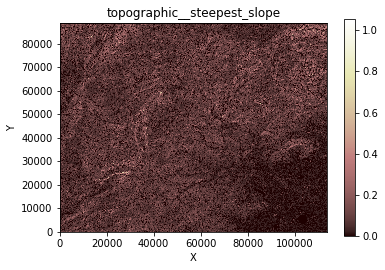

In [15]:
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__steepest_slope')

In [22]:
mg.at_node['topographic__steepest_slope']

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])